# Capstone Project 1: Data Story

# 1. Introduction
Solar energy is renewable, available worldwide, and has low carbon footprint, thus offers multiple benifits over fossil fuel energy. The primary challange however, lies in accurate prediction of solar energy given its dependence on weather variables. Erroneous prediction in production often cost the utilities dearly following emergency purchase of power from neighbouring utilities. 

Purpose of this work is to understand how differnt weather variables influnce solar energy production using exploratory analysis on numerical weather prediction (NWP) model data from NOAA/ESRL Global Ensemble Forecasting System (GEFS). The analysys would reveal underlying pattern and correlation in the dataset instrumental for developing hypothesis. Along the process we will address the following questions.

1. What are those varibales and how can they affect solar energy production?
2. How the variables are distributed?
3. How they change with time? Are the pattern similar?
4. How those variables change seasonally? Is there any long term change?
5. Which variables are strongly correlated? Which variable has most/ least impact on solar energy production?
6. Can we reduce the dimension of the dataset? Would it impact the performance?

# 2. What are these variables and how they affect solar energy production

<img src="srb.gif">

Earth receives all the energy from the sun, distributes it following complex interactions among the elements of the climate system, and radiates it back to the space. Once the solar radiation reaches surface, solar power utilities engage the solar panels to tap this enormous energy source. These solar panels contain photovoltaic (PV) cells, which uses photons to separate electrons from atoms, and turn the light into electricity. The amount of solar power generation depends on solar raditiation reaching the panel, which in turn depends on its location of (e.g., how far it is from equator) as well as the presence of cloud, atmospheric particls, water vapor etc over it, as they can absorb and re-emit energy before it reacehes the surface. Thus it is obvious that seasonal variation in weather parameters, such as water vapor, cloud cover etc. would affect the solar energy generation. But the seasonality in the radiation itself caused by earths's tilt possibly results largest variation in the energy production.

How much change the weather elements can cause in solar power generation! To figure that out we have adopted the numerical weather prediction (NWP) model data from NOAA/ESRL Global Ensemble Forecasting System (GEFS). The variables under study are-


1. downward long-wave radiative flux average at the surface (dlwrfs)
2. downward short-wave radiative flux average at the surface (dswrfs)
3. upward long-wave radiation at the surface (ulwrfs)
4. upward long-wave radiation at the top of the atmosphere (ulwrf)
5. upward short-wave radiation at the surface (uswrfs)

6. maximum temperature over the past 3 hours at 2 m above the ground (maxt)
7. minimum temperature over the past 3 hours at 2 m above the ground (mint)
8. current temperature at 2 m above the ground (t)
9. temperature of the surface (ts)

10. air pressure at mean sea level (pr)
11. 3-Hour accumulated precipitation at the surface (precip)
12. precipitable water over the entire depth of the atmosphere (pw)
13. specific humidity at 2 m above ground (h)
14. total cloud cover over the entire depth of the atmosphere (tcc)
15. total column-integrated condensate over the entire atmosphere (tc)

Radiative flux can be defined as the amount of solar energy radiated through a given area. Solar energy enters our atmosphere as shortwave radiation in the form of ultraviolet (UV) rays and visible light. The sun emits shortwave radiation because it is extremely hot and has a lot of energy to give off. Once in the Earth’s atmosphere, clouds and the surface absorb the solar energy. The ground heats up and re-emits energy as longwave radiation in the form of infrared rays which contain much less energy than the shortwave radiation. Earth emits longwave radiation because it is cooler than the sun and has much less energy available to give off. The surface temperature depends on how much energy is absorbed by it. Therefore radiative flux and temperature are closely related and in general good proxy to each other. Other weather variables such as, precipitation, pricipitable water, humidity etc. are more loosely related to the total power generation, which we will explore later. 

# 3. How are the variables distributed? 

We would first import the necessary modules and load the NWP model data. We will focus on a single station 'ACME' for the entire analysis. The variables at 'ACME' station were earlier derived through linear interpolation. Here, we would look into the frequency distribution of each variable. 

In [70]:
# Import necessary modules
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [129]:
###  Load NWP data to dataframe from csv: for station 'ACME'
## Radiative Flux
# downward shortwave radiation at surface at station 'ACME': dswrfs
dswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\DSWRF\\dswrf_station.csv", header=None)
# downward longwave radiation at surface at station 'ACME': dlwrfs
dlwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\DLWRF\\dlwrf_station.csv", header=None)
# upward shortwave radiation at surface at station 'ACME': uswrfs
uswrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\USWRF_sfc\\uswrfs_station.csv", header=None)
# upward longwave radiation at surface at station 'ACME': ulwrfs
ulwrfs = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\ULWRF_sfc\\ulwrfs_station.csv", header=None)
# upward longwave radiation at top of the atmosphere (TOA) over station 'ACME': ulwrf
ulwrf = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\ULWRF\\ulwrf_station.csv", header=None)

## Temperature data
# Temperature at surface at station 'ACME': ts
ts = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Temp_sfc\\ts_station.csv", header=None)
# Temperature 2m above surface at station 'ACME': t
t = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Temp\\t_station.csv", header=None)
# minimum temperature 2m above surface at station 'ACME': mint
mint = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Min_temp\\mint_station.csv", header=None)
# maximum temperature 2m above surface at station 'ACME': maxt
maxt = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Max_temp\\maxt_station.csv", header=None)


## Other weather variables
# total column-integrated condensate over the entire atmosphere at station 'ACME': tc
tc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Total_condensate\\tc_station.csv", header=None)
# total cloud cover over the entire depth of the atmosphere at station 'ACME': tcc
tcc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Total_cloud_cover\\tcc_station.csv", header=None)
# specific humidity at 2 m above ground 'ACME': h
h = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Sp_humidity\\h_station.csv", header=None)
# precipitable water over the entire depth of the atmosphere at station 'ACME': pw
pw = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Precip_water\\pw_station.csv", header=None)
# 3-Hour accumulated precipitation at the surface at station 'ACME': precip
precip = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Precipitation\\precip_station.csv", header=None)
# air pressure at mean sea level at 'ACME': pr
pr = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Pressure\\pr_station.csv", header=None)

# Target Solar energy: loading traget dataset
target = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\train.csv")

## 3.1. Frequency distribution: radiative flux

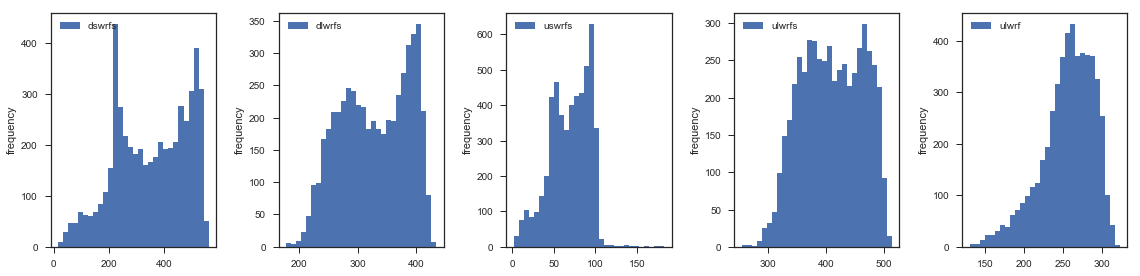

Summary statistics of radiative flux data:
            dswrfs       dlwrfs       uswrfs       ulwrfs        ulwrf
count  5113.000000  5113.000000  5113.000000  5113.000000  5113.000000
mean    350.834975   329.050520    68.970873   410.980022   255.683397
std     130.377819    57.818926    23.835364    52.774717    33.947501
min      16.153026   178.512698     2.244599   255.119225   129.706740
25%     239.426658   280.683939    51.539085   368.233172   237.599926
50%     359.179911   330.865447    71.610417   410.400055   260.127657
75%     471.298605   383.003791    89.218567   457.961941   281.387971
max     559.542829   433.824405   182.335638   514.294877   323.332986


In [152]:
# Frequency distribution of all radiative flux from 14 years of data

fig, axes = plt.subplots(nrows=1, ncols=5)
ax0, ax1, ax2, ax3, ax4 = axes.flatten()
n_bins = 30
ax0.hist(dswrfs[0], n_bins, histtype='bar', label='dswrfs')
leg = ax0.legend(loc='upper left')
leg.draw_frame(False)
ax0.set_ylabel('frequency')

ax1.hist(dlwrfs[0], n_bins, histtype='bar', label='dlwrfs')
leg = ax1.legend(loc='upper left')
leg.draw_frame(False)
ax1.set_ylabel('frequency')

ax2.hist(uswrfs[0], n_bins, histtype='bar', label='uswrfs')
leg = ax2.legend(loc='upper left')
leg.draw_frame(False)
ax2.set_ylabel('frequency')

ax3.hist(ulwrfs[0], n_bins, histtype='bar', label='ulwrfs')
leg = ax3.legend(loc='upper left')
leg.draw_frame(False)
ax3.set_ylabel('frequency')

ax4.hist(ulwrf[0], n_bins, histtype='bar', label='ulwrf')
leg = ax4.legend(loc='upper left')
leg.draw_frame(False)
ax4.set_ylabel('frequency')

plt.savefig('rf_hist.png')
fig.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = [16,4]
#plt.savefig('rf_hist.pdf')

# Summary statistics of temperature data
print('Summary statistics of radiative flux data:')
dswrfs_des = dswrfs.describe()
dlwrfs_des = dlwrfs.describe()
uswrfs_des = uswrfs.describe()
ulwrfs_des = ulwrfs.describe()
ulwrf_des = ulwrf.describe()
rf_stat = pd.concat([dswrfs_des, dlwrfs_des, uswrfs_des, ulwrfs_des, ulwrf_des], axis=1)
rf_stat.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf']
print(rf_stat)


### 3.1.1. Discussion
The downward radiation flux contains 2 distinct peaks possibly coinciding with summer and winter, while the upward radiation flux at TOA doesn't. The variation as well as the magnitude of incoming shortwave solar radiation is highest among all fluxes. From the summary statistics it is clear that the upward radiation is mainly longwave.

## 3.2. Frequency distribution: temperature

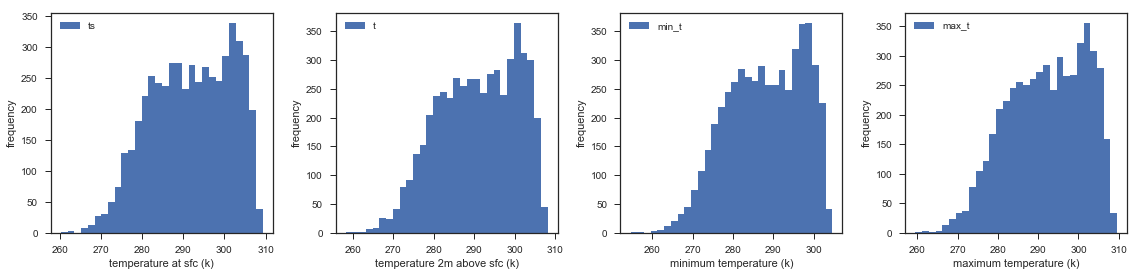

Summary statistics of temperature data:
                ts            t        min_t        max_t
count  5113.000000  5113.000000  5113.000000  5113.000000
mean    291.943878   290.941140   288.050225   292.113331
std       9.730361     9.717344     9.355779     9.653834
min     260.318799   258.286256   254.633481   259.538772
25%     284.334487   283.327246   280.731953   284.678492
50%     292.429112   291.546336   288.459987   292.722944
75%     300.569327   299.497619   296.317714   300.563230
max     309.332477   308.122303   304.629815   309.602393


In [151]:
# Histograms of all temperature data

fig, axes = plt.subplots(nrows=1, ncols=4)
ax0, ax1, ax2, ax3 = axes.flatten()
n_bins = 30

ax0.hist(ts[0], n_bins, histtype='bar', label='ts')
leg = ax0.legend(loc='upper left')
leg.draw_frame(False)
ax0.set_ylabel('frequency')
ax0.set_xlabel('temperature at sfc (k)')


ax1.hist(t[0], n_bins, histtype='bar', label='t')
leg = ax1.legend(loc='upper left')
leg.draw_frame(False)
ax1.set_ylabel('frequency')
ax1.set_xlabel('temperature 2m above sfc (k)')


ax2.hist(mint[0], n_bins, histtype='bar', label='min_t')
leg = ax2.legend(loc='upper left')
leg.draw_frame(False)
ax2.set_ylabel('frequency')
ax2.set_xlabel('minimum temperature (k)')


ax3.hist(maxt[0], n_bins, histtype='bar', label='max_t')
leg = ax3.legend(loc='upper left')
leg.draw_frame(False)
ax3.set_ylabel('frequency')
ax3.set_xlabel('maximum temperature (k)')

fig.tight_layout()
plt.savefig('t_hist.png')
plt.show()

# Summary statistics of temperature data
print('Summary statistics of temperature data:')
ts_des = ts.describe()
t_des = t.describe()
mint_des = mint.describe()
maxt_des = maxt.describe()
t_stat = pd.concat([ts_des, t_des, mint_des, maxt_des], axis=1)
t_stat.columns = ['ts', 't', 'min_t', 'max_t']
print(t_stat)


### 3.2.1. Discusison
The distribution as well as the summary statistics are similar for all temperature variables as expected. The upward lonwave radiation re-emitted by the surface depends on the temperature of the surface and are closely related.

## 3.3. Frequency distribution: other weather variables
Other weather variables include total condensate, total cloud cover, specific humidity, precipitable water, precipitation and pressure.

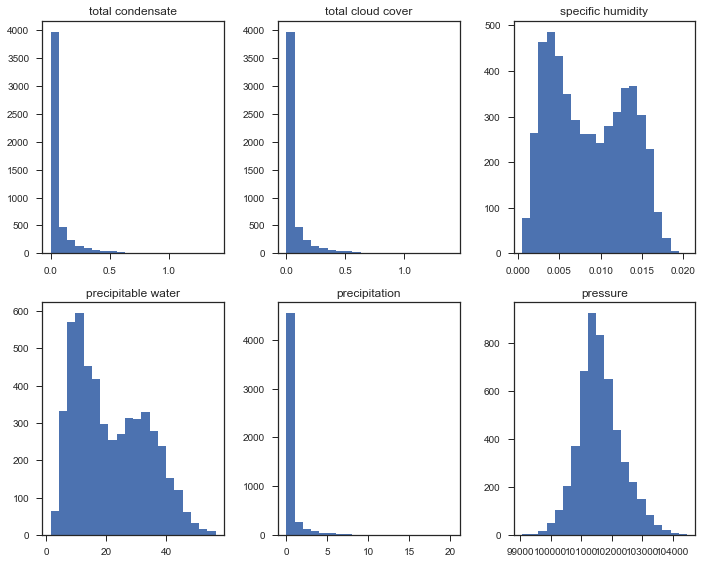

Summary statistics of weather variable data:
                tc          tcc            h           pw       precip  \
count  5113.000000  5113.000000  5113.000000  5113.000000  5113.000000   
mean      0.061296     0.060980     0.008635    21.608479     0.407633   
std       0.127186     0.127305     0.004573    11.959801     1.209306   
min       0.000062     0.000000     0.000497     1.480269     0.000000   
25%       0.001302     0.000674     0.004452    11.089578     0.000000   
50%       0.009604     0.009231     0.008235    19.110287     0.001498   
75%       0.058732     0.058725     0.012774    31.399079     0.165817   
max       1.398001     1.398177     0.020450    56.602561    20.104204   

                  pr  
count    5113.000000  
mean   101627.685348  
std       715.369578  
min     99056.498830  
25%    101165.580317  
50%    101556.280456  
75%    102034.126807  
max    104476.035765  


In [119]:
# Histograms of all the weather variables

fig, axes = plt.subplots(nrows=2, ncols=3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
n_bins = 20
ax0.hist(tc[0], n_bins, histtype='bar', label='tc')
ax0.set_title('total condensate')

ax1.hist(tcc[0], n_bins, histtype='bar', label='tcc')
ax1.set_title('total cloud cover')

ax2.hist(h[0], n_bins, histtype='bar', label='h')
ax2.set_title('specific humidity')

ax3.hist(pw[0], n_bins, histtype='bar', label='pw')
ax3.set_title('precipitable water')

ax4.hist(precip[0], n_bins, histtype='bar', label='precip')
ax4.set_title('precipitation')

ax5.hist(pr[0], n_bins, histtype='bar', label='pr')
ax5.set_title('pressure')


fig.tight_layout()
plt.savefig('weather_hist.png')
plt.show()

plt.rcParams["figure.figsize"] = [10,8]

# Summary statistics of temperature data
print('Summary statistics of weather variable data:')
tc_des = tc.describe()
tcc_des = tcc.describe()
h_des = h.describe()
pw_des = pw.describe()
precip_des = precip.describe()
pr_des = pr.describe()
var_stat = pd.concat([tc_des, tcc_des, h_des, pw_des, precip_des, pr_des], axis=1)
var_stat.columns = ['tc', 'tcc', 'h', 'pw', 'precip', 'pr']
print(var_stat)

### 3.3.1. Discussion
For total condensate, cloud cover and precipitation, most data are concentrated near first bin. Specific humidity and precipitable water has bimodal distribution with a second peak (relatively smaller) towards the tail. Pressure data is more normally distributed.

## 3.4. Conclusion
The frequency distribution of variables are markedly different but can be grouped in several categories. 
group 1. bimodal distribution: dswrfs, dlwrfs, uswrfs, ulwrfs, ts, t, mint, maxt, specific humidity, and precipitable water;
group 2. single mode: approximately normal: pressure; and 
group 3. single mode: skewed distribution: ulwrf, total condensate, cloud cover, and precipitation

# 4. How the variables change with time? Is there any pattern?
## 4.1 Time series analysis: radiative flux

The time series is plotted with 14 years (1994 - 2007) of data. First, the total amount of radiation received at surface and re-emitted from surface are calculated. The net energy at surface is calculated as the difference of these two. The plots are shown below.

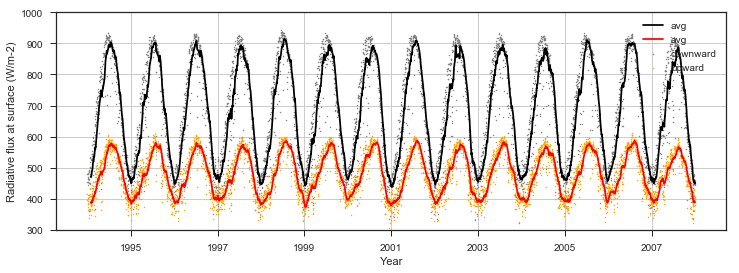

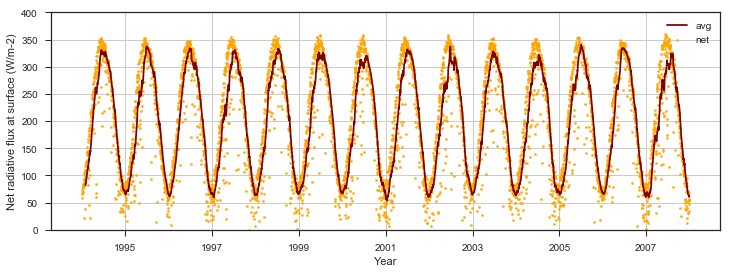

In [77]:
#total downward radiation flux at surface at station 'ACME': down
down = dswrfs + dlwrfs
#total upward radiation flux at surface at station 'ACME': up
up = uswrfs + ulwrfs

# Net radiation at surface = total dowanward radiation - total upward radiation : rs
rs = down - up

dates = np.arange(np.datetime64('1994-01-01'), np.datetime64('2008-01-01'))
dates[:365]
# plot time series of upward and downward radiation

# Convert numpy to dataframe
x = pd.DataFrame(dates)
y1 = down
df1 = pd.concat([x, y1], axis=1)
df1.columns = ['date', 'down']

# esttimating the rolling average
df1['avg'] = df1['down'].rolling(window=30).mean()

plt.scatter(dates, down[0].values, s=5, marker='.', color='gray', label='downward')
plt.plot(df1['date'], df1['avg'], color='black')

y2 = up
df2 = pd.concat([x, y2], axis=1)
df2.columns = ['date', 'up']
# esttimating the rolling average
df2['avg'] = df2['up'].rolling(window=30).mean()

plt.scatter(dates, up[0].values, s=5, marker='.', color='orange', label='upward')
plt.plot(df2['date'], df2['avg'], color='red')

plt.ylim(300,1000)
plt.xlabel('Year')
plt.ylabel('Radiative flux at surface (W/m-2)')
#plt.xticks(rotation=45)
leg = plt.legend(loc='upper right')
leg.draw_frame(False)
plt.rcParams["figure.figsize"] = [12,4]
plt.grid(True)
plt.savefig('up_dn_ts.png')
plt.show()

# plot net radiation at surface
y3 = rs
df3 = pd.concat([x, y3], axis=1)
df3.columns = ['date', 'rs']
# esttimating the rolling average
df3['avg'] = df3['rs'].rolling(window=30).mean()

plt.scatter(dates, rs[0].values, s=5, color='orange', label='net')
plt.plot(df3['date'], df3['avg'], color='maroon')

plt.ylim(0,400)
plt.xlabel('Year')
plt.ylabel('Net radiative flux at surface (W/m-2)')
#plt.xticks(rotation=45)
leg = plt.legend(loc='upper right')
leg.draw_frame(False)
plt.rcParams["figure.figsize"] = [12,4]
plt.grid(True)
plt.savefig('net_rf_ts.png')
plt.show()


### 4.1.1. Discussion
The variation in radiation dependes on the tilt of the earth's axis. Seasonality is evident for all radiative flux with a high in summer and low in winter.

## 4.2. Time series: temperature

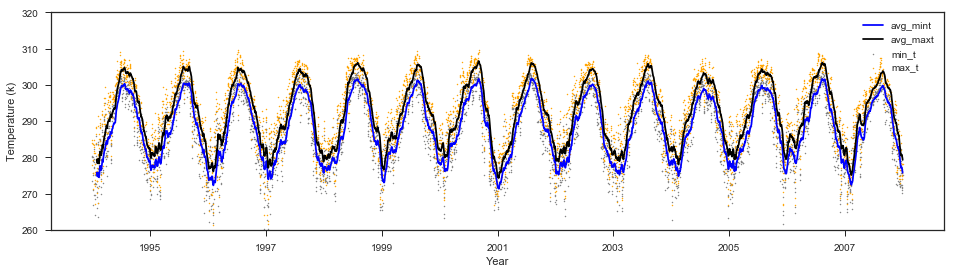

In [94]:
# plot time series of temperature variables

x = pd.DataFrame(dates)

# plot time series of minimum temperature
y1 = mint
df1 = pd.concat([x, y1], axis=1)
df1.columns = ['date', 'mint']
# esttimating the rolling average
df1['avg_mint'] = df1['mint'].rolling(window=30).mean()

plt.scatter(dates, mint[0].values, s=5, marker='.', color='gray', label='min_t')
plt.plot(df1['date'], df1['avg_mint'], color='blue')

# plot time series of minimum temperature
y2 = maxt
df2 = pd.concat([x, y2], axis=1)
df2.columns = ['date', 'maxt']
# esttimating the rolling average
df2['avg_maxt'] = df2['maxt'].rolling(window=30).mean()


plt.scatter(dates, maxt[0].values, s=5, marker='.', color='orange', label='max_t')
plt.plot(df2['date'], df2['avg_maxt'], color='black')

plt.ylim(260,320)
plt.xlabel('Year')
plt.ylabel('Temperature (k)')
#plt.xticks(rotation=45)
leg = plt.legend(loc='upper right')
leg.draw_frame(False)
plt.rcParams["figure.figsize"] = [16,6]
plt.savefig('t_ts.png')
plt.show()

### 4.2.1. Discussion
Similar to radiative flux, highs in summer and lows in winter can be seen in temperature time series.

## 4.3. Other weather variables
As magnitude of these variables vary greatly, they were scaled before time series plot.

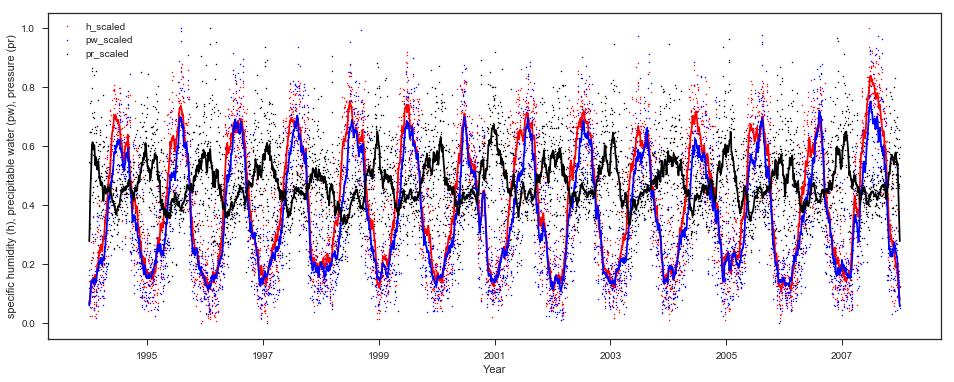

In [123]:
# time series of weater variables: any seasonality??
dates = np.arange(np.datetime64('1994-01-01'), np.datetime64('2008-01-01'))
dates[:365]

# scaling the data to show them in same plot

x = var.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
var_sc = pd.DataFrame(x_scaled)
var_sc.columns = ['tc', 'tcc', 'h', 'pw', 'precip', 'pr']
#print(var_sc)

# esttimating the noving average
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

x = dates
y = var_sc['h']
plt.scatter(x, y, s=5, marker='.', color='red', label='h_scaled')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='red')

y = var_sc['pw']
plt.scatter(x, y, s=5, marker='.', color='blue', label='pw_scaled')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='blue')

y = var_sc['pr']
plt.scatter(x, y, s=5, marker='.', color='black', label='pr_scaled')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='black')

plt.xlabel('Year')
plt.ylabel('specific humidity (h), precipitable water (pw), pressure (pr)')
plt.legend(loc='upper left')
plt.savefig('weather_ts.png')
plt.show()
plt.rcParams["figure.figsize"] = [16,6]
# only 'h', 'pw', and 'pr' have seasonality



### 4.3.1. Discussion
Seasonality is evident only in specific humidity, precipitable water and pressure. While specific humidity and precipitable water are high in summer months, the pressure goes down during that time.

## 4.4. Solar energy production


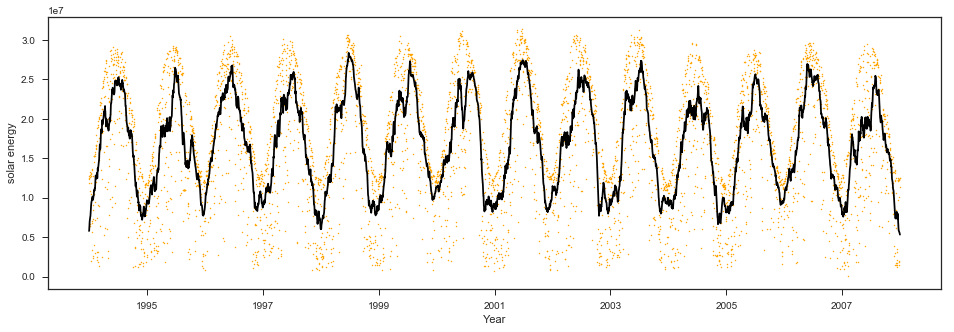

In [142]:
y = target['ACME']
x = dates
plt.scatter(x, y, s=5, marker='.', color='orange')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='black')
plt.xlabel('Year')
plt.ylabel('solar energy')
plt.savefig('solar energy.png')
plt.show()
plt.rcParams["figure.figsize"] = [16,5]


### 4.4.1. Discusison
Solar energy also has strong seasonality. But its variability depends on various weather elements as well. 

## 4.5 Conclusion
As many variables (e.g., radiative flux, temperature, specific humidity, precipitable water) show similar seasonal pattern, it would be worth to check how strongly they are correlated to each other. Possibly a small number of variable would be sufficient to predict the solar energy reasonably.

# 5. How those variables change seasonally? Is there any long term trend?

As seasonality is observed in many variables daily average on the day of year are made from 1994 - 2007. 
## 5.1. Seasonal variation: radiative flux
The seasonal variation of all radiative flux, total incoming radiative flux, total upward radiative flux, net flux at surface are plotted.

In [47]:
# for all radiative flux type
file = [dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf]
avg_rf = pd.DataFrame()
for j in range(5):
    rf = file[j]
    #Averaging radiative flux over each day in the year: avg_rf
    # days in year from 1994 to 2007: leap year- 1996, 2000, 2004
    d = [365, 730, 1096, 1461, 1826, 2191, 2557, 2922, 3287, 3652, 4018, 4383, 4748, 5113]

    yr = rf[:365]
    for i in range(2007 - 1994):
        yr1 = rf[d[i]:d[i+1]]
        yr1.reset_index(inplace=True, drop=True)
        yr = pd.concat([yr, yr1], axis=1)
    a = list(range(1994, 2008))
    # selecting only 365 days from each year
    yr = yr[:365]
    yr.columns = a
    avg_yr = yr.mean(axis=1)
    avg_rf = pd.concat([avg_rf, avg_yr], axis=1)
    
avg_rf.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf']
print(avg_rf.head())

       dswrfs      dlwrfs     uswrfs      ulwrfs       ulwrf
0  170.476613  284.415174  40.751387  354.639818  231.343785
1  196.474671  270.641596  47.085223  354.130252  234.586401
2  202.727605  271.275975  53.491501  352.178326  244.420522
3  196.292993  270.740749  47.683127  349.303681  232.534544
4  185.783012  266.173697  45.317694  339.268464  224.348178


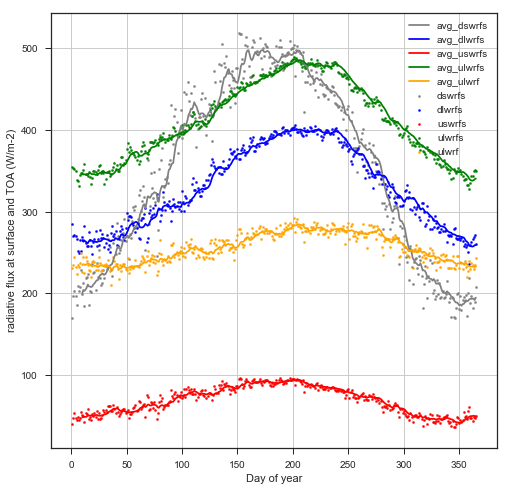

In [154]:
# plotting seasonal variation in radiative flux
days = list(range(1, 366))
x = pd.DataFrame(days)

# downward shortwave radiative flux at surface
y1 = avg_rf['dswrfs']
df1 = pd.concat([x, y1], axis=1)
df1.columns = ['date', 'dswrfs']
df1['avg_dswrfs'] = df1['dswrfs'].rolling(window=10).mean()

plt.scatter(days, avg_rf['dswrfs'].values, s=5, color='gray', label='dswrfs')
plt.plot(x, df1['avg_dswrfs'], color='gray')

# downward longwave radiative flux at surface
y2 = avg_rf['dlwrfs']
df2 = pd.concat([x, y2], axis=1)
df2.columns = ['date', 'dlwrfs']
df2['avg_dlwrfs'] = df2['dlwrfs'].rolling(window=10).mean()

plt.scatter(days, avg_rf['dlwrfs'].values, s=5, color='blue', label='dlwrfs')
plt.plot(x, df2['avg_dlwrfs'], color='blue')

# upward shortwave radiative flux at surface
y3 = avg_rf['uswrfs']
df3 = pd.concat([x, y3], axis=1)
df3.columns = ['date', 'uswrfs']
df3['avg_uswrfs'] = df3['uswrfs'].rolling(window=10).mean()

plt.scatter(days, avg_rf['uswrfs'].values, s=5, color='red', label='uswrfs')
plt.plot(x, df3['avg_uswrfs'], color='red')

# upward longwave radiative flux at surface
y4 = avg_rf['ulwrfs']
df4 = pd.concat([x, y4], axis=1)
df4.columns = ['date', 'ulwrfs']
df4['avg_ulwrfs'] = df4['ulwrfs'].rolling(window=10).mean()

plt.scatter(days, avg_rf['ulwrfs'].values, s=5, color='green', label='ulwrfs')
plt.plot(x, df4['avg_ulwrfs'], color='green')

# upward longwave radiative flux at top of the atmosphere (TOA)
y5 = avg_rf['ulwrf']
df5 = pd.concat([x, y5], axis=1)
df5.columns = ['date', 'ulwrf']
df5['avg_ulwrf'] = df5['ulwrf'].rolling(window=10).mean()

plt.scatter(days, avg_rf['ulwrf'].values, s=5, color='orange', label='ulwrf')
plt.plot(x, df5['avg_ulwrf'], color='orange')


plt.xlabel('Day of year')
plt.ylabel('radiative flux at surface and TOA (W/m-2)')
leg = plt.legend(loc='upper right')
leg.draw_frame(False)
plt.rcParams["figure.figsize"] = [8,8]
plt.grid(True)
plt.savefig('rf_avg.png')
plt.show()

Index(['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf'], dtype='object')


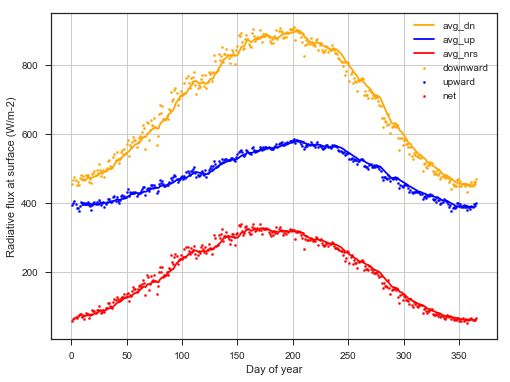

In [111]:
# Plotting upward, downward and net radiation at surface
print(avg_rf.columns)
dn = avg_rf['dswrfs'] + avg_rf['dlwrfs']
up = avg_rf['uswrfs'] + avg_rf['ulwrfs']

# Net radiation at surface, downward flux - upward flux at surface: nrs
nrs = dn - up
x = pd.DataFrame(days)

# downward radiation at surface
y1 = dn
df1 = pd.concat([x, y1], axis=1)
df1.columns = ['date', 'dn']
df1['avg_dn'] = df1['dn'].rolling(window=10).mean()

plt.scatter(days, dn.values, s=5, color='orange', label='downward')
plt.plot(df1['date'], df1['avg_dn'], color='orange')

# upward radiation at surface
y2 = up
df2 = pd.concat([x, y2], axis=1)
df2.columns = ['date', 'up']
df2['avg_up'] = df2['up'].rolling(window=10).mean()

plt.scatter(days, up.values, s=5, color='blue', label='upward')
plt.plot(df2['date'], df2['avg_up'], color='blue')

# net radiation at surface
y3 = nrs
df3 = pd.concat([x, y3], axis=1)
df3.columns = ['date', 'nrs']
df3['avg_nrs'] = df3['nrs'].rolling(window=10).mean()

plt.scatter(days, nrs.values, s=5, color='red', label='net')
plt.plot(df3['date'], df3['avg_nrs'], color='red')


plt.xlabel('Day of year')
plt.ylabel('Radiative flux at surface (W/m-2)')
leg = plt.legend(loc='upper right')
leg.draw_frame(False)
plt.rcParams["figure.figsize"] = [8,6]
plt.grid(True)
plt.savefig('net_avg.png')
plt.show()

## 5.1.1. Discussion
All of them have seasonality: a high in summer and a low in winter. However, the peaks of short and long waves correspond to different time of year. That means that peak in re-emitted energy is off-set from the peak of directly emitted solar energy. The variation in incoming shortwave flux is much larger than any other flux. Re-emitted longwave has smaller variation due to lower surface temperature.
The seasonality in total upward and downward flux are similar, higher flux in summer and lower flux in winter. That is obvious as more radiative flux reaches surface during summer.The peak of the dowanward and upward flux has a time lag as seen before.  The upward flux and net flux depends on how heated the surface becomes following absorption and how much energy the surface gives off. The plot suggests that despite higher amount of energy is re-emitted from surface (upward) the amount is relatively less than the extra energy it receives during summer. The question is how much more or less! We will focus on it next by answering these questions! 

1. What fraction of downward radiation is re-emitted from surface? How does that vary seasonally?
2. What fraction of incomng radiation is shortwave and what fraction of upward radiation is long wave?
3. What fraction of incoming at surface goes back to the top of the atmosphere?

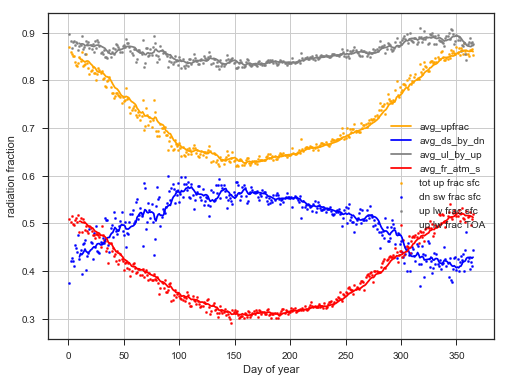

In [112]:
# what fraction of downward radiation is reemitted from surface? ans: upward radiation / downward radiation
up_frac = up/dn

# what fraction of incomng radiation is shortwave and what fraction of upward radiation is long wave?
ds_by_dn = avg_rf['dswrfs']/dn
ul_by_up = avg_rf['ulwrfs']/up

# what fraction of incoming at surface goes back to the top of the atmosphere? ulwrfs/ulwrf
fr_atm_s = avg_rf['ulwrf']/dn

# plotting them
y1 = up_frac
df1 = pd.concat([x, y1], axis=1)
df1.columns = ['date', 'upfrac']
df1['avg_upfrac'] = df1['upfrac'].rolling(window=10).mean()
 
plt.scatter(days, up_frac.values, s=5, color='orange', label='tot up frac sfc')
plt.plot(df1['date'], df1['avg_upfrac'], color='orange')

y2 = ds_by_dn
df2 = pd.concat([x, y2], axis=1)
df2.columns = ['date', 'ds_by_dn']
df2['avg_ds_by_dn'] = df2['ds_by_dn'].rolling(window=10).mean()

plt.scatter(days, ds_by_dn.values, s=5, color='blue', label='dn sw frac sfc')
plt.plot(df2['date'], df2['avg_ds_by_dn'], color='blue')

y3 = ul_by_up
df3 = pd.concat([x, y3], axis=1)
df3.columns = ['date', 'ul_by_up']
df3['avg_ul_by_up'] = df3['ul_by_up'].rolling(window=10).mean()

plt.scatter(days, ul_by_up.values, s=5, color='gray', label='up lw frac sfc')
plt.plot(df3['date'], df3['avg_ul_by_up'], color='gray')

y4 = fr_atm_s
df4 = pd.concat([x, y4], axis=1)
df4.columns = ['date', 'fr_atm_s']
df4['avg_fr_atm_s'] = df4['fr_atm_s'].rolling(window=10).mean()

plt.scatter(days, fr_atm_s.values, s=5, color='red', label='up lw frac TOA')
plt.plot(df4['date'], df4['avg_fr_atm_s'], color='red')

leg = plt.legend(loc='center right')
leg.draw_frame(False)
plt.xlabel('Day of year')
plt.ylabel('radiation fraction')
plt.grid(True)
plt.savefig('rf_frac.png')
plt.show()


### 5.1.2. Discussion
The fraction of total radiation re-emitted from surface (Orange) goes down to ~63% in summer. While the downward radiation (in blue) has significant amount of longwave radiation (probably due to presence of atmospheric particle, cloud), upward radiation (in gray) almost entirely made of longwave radiation. The fraction of radiation at the top of atmosphere relative to the incoming at surface is high in winter and low in summer as more energy is retained near the surface during summer.

## 5.2. Seasonal variation: temperature

In [95]:
# Averaging all temperature data on day basis and annually
file = [ts, t, mint, maxt]
avg_t = pd.DataFrame()
annual_t = pd.DataFrame()
for j in range(4):
    temp = file[j]
    #Averaging temp over each day in the year: avg_t
    # Annual average of temp: annual_t
    # days in year from 1994 to 2007: leap year- 1996, 2000, 2004
    d = [365, 730, 1096, 1461, 1826, 2191, 2557, 2922, 3287, 3652, 4018, 4383, 4748, 5113]

    yr = temp[:365]

    for i in range(2007 - 1994):
        yr1 = temp[d[i]:d[i+1]]
        yr1.reset_index(inplace=True, drop=True)
        yr = pd.concat([yr, yr1], axis=1)
    a = list(range(1994, 2008))
    yr = yr[:365]
    yr.columns = a

    avg_yr = yr.mean(axis=1)
    annual_avg = yr.mean(axis=0)
    #print(type(avg_yr))
    avg_t = pd.concat([avg_t, avg_yr], axis=1)
    annual_t = pd.concat([annual_t, annual_avg], axis=1)
avg_t.columns = ['ts', 't', 'mint', 'maxt']
annual_t.columns = ['ts', 't', 'mint', 'maxt']


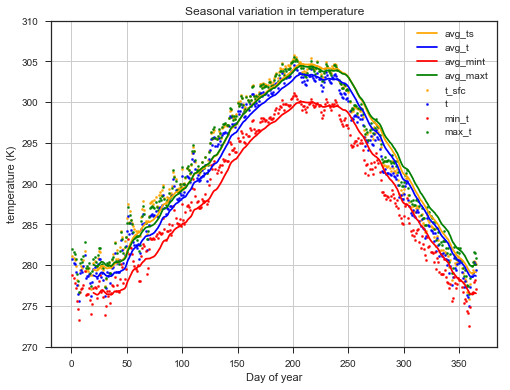

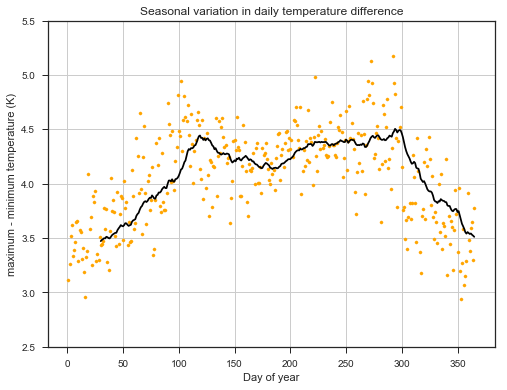

In [114]:
# plotting the seanal variation in temperature 
days = list(range(1, 366))
x = pd.DataFrame(days)
y2 = ds_by_dn

plt.scatter(days, avg_t['ts'], s=5, color='orange', label='t_sfc')
plt.scatter(days, avg_t['t'], s=5, color='blue', label='t')
plt.scatter(days, avg_t['mint'], s=5, color='red', label='min_t')
plt.scatter(days, avg_t['maxt'], s=5, color='green', label='max_t')

#estimating rolling average
y1 = avg_t['ts']
df1 = pd.concat([x, y1], axis=1)
df1.columns = ['date', 'ts']
df1['avg_ts'] = df1['ts'].rolling(window=20).mean()
plt.plot(df1['date'], df1['avg_ts'], color='orange')

y2 = avg_t['t']
df2 = pd.concat([x, y2], axis=1)
df2.columns = ['date', 't']
df2['avg_t'] = df2['t'].rolling(window=20).mean()
plt.plot(df2['date'], df2['avg_t'], color='blue')

y3 = avg_t['mint']
df3 = pd.concat([x, y3], axis=1)
df3.columns = ['date', 'mint']
df3['avg_mint'] = df3['mint'].rolling(window=20).mean()
plt.plot(df3['date'], df3['avg_mint'], color='red')

y4 = avg_t['maxt']
df4 = pd.concat([x, y4], axis=1)
df4.columns = ['date', 'maxt']
df4['avg_maxt'] = df4['maxt'].rolling(window=20).mean()
plt.plot(df4['date'], df4['avg_maxt'], color='green')


plt.xlabel('Day of year')
plt.ylabel('temperature (K)')
plt.title('Seasonal variation in temperature')
leg = plt.legend(loc='upper right')
leg.draw_frame(False)
plt.ylim(270,310)
#plt.figure(figsize=(3,4))
plt.rcParams["figure.figsize"] = [8,6]
plt.grid(True)
plt.savefig('t_avg.png')
plt.show()

# How the change in temperature (max_t - min_t) vary throughout the year
avg_t_diff = avg_t['maxt'] - avg_t['mint']
plt.scatter(days, avg_t_diff, s=10, color='orange')
plt.xlabel('Day of year')
plt.ylabel('maximum - minimum temperature (K)')
plt.title('Seasonal variation in daily temperature difference')
plt.ylim(2.5, 5.5)

df = pd.concat([x, avg_t_diff], axis=1)
df.columns = ['date', 'diff']
df['avg_diff'] = df['diff'].rolling(window=30).mean()
plt.plot(df['date'], df['avg_diff'], color='black')
plt.grid(True)
plt.savefig('t_diff.png')
plt.show()



### 5.2.1 Discussion
The temperature gradient near the surface is pretty steep. That causes large change in temperature within just 2m height above surface. The seasonality is similar to the radiative flux as expected. However the difference in daily maximum and minimum temperature is higher during spring and fall and least in winter.  

### 5.2.3. Any long term trend?
Averaged annual temperature is plotted from 1994 - 2007.

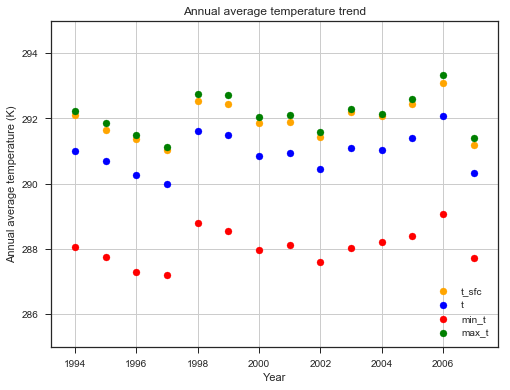

In [107]:
# Any trend in annual average values??
year = list(range(1994, 2008))
plt.scatter(year, annual_t['ts'], color='orange', label='t_sfc')
plt.scatter(year, annual_t['t'], color='blue', label='t')
plt.scatter(year, annual_t['mint'], color='red', label='min_t')
plt.scatter(year, annual_t['maxt'], color='green', label='max_t')

plt.xlabel('Year')
plt.ylabel('Annual average temperature (K)')
plt.title('Annual average temperature trend')
plt.ylim(285,295)
leg = plt.legend(loc='lower right')
leg.draw_frame(False)
plt.grid(True)
plt.show()


### 5.2.4 Discussion
The temperature seems to be increasing consistently since 2002, a sign for global warming!!!

## 5.3 Seasonal variation in water vapor and pressure

In [128]:
# for all weather variables
file = [tc, tcc, h, pw, precip, pr]
avg_var = pd.DataFrame()
for j in range(6):
    v = file[j]
    #Averaging  over each day in the year: avg_var
    # days in year from 1994 to 2007: leap year- 1996, 2000, 2004
    d = [365, 730, 1096, 1461, 1826, 2191, 2557, 2922, 3287, 3652, 4018, 4383, 4748, 5113]

    yr = v[:365]

    for i in range(2007 - 1994):
        #print(d[i], d[i+1])
        yr1 = v[d[i]:d[i+1]]
        yr1.reset_index(inplace=True, drop=True)
        yr = pd.concat([yr, yr1], axis=1)
    a = list(range(1994, 2008))
    yr = yr[:365]
    yr.columns = a

    avg_yr = yr.mean(axis=1)
    #print(type(avg_yr))
    avg_var = pd.concat([avg_var, avg_yr], axis=1)
    
avg_var.columns = ['tc', 'tcc', 'h', 'pw', 'precip', 'pr']

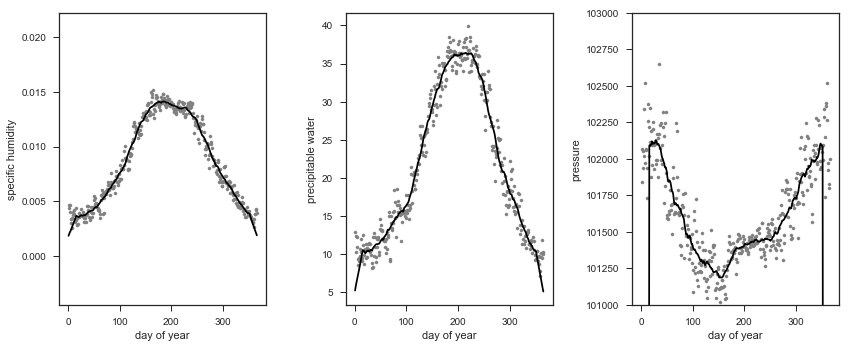

In [162]:
# Any seasonality in the variables?
days = list(range(1, 366))

fig, axes = plt.subplots(nrows=1, ncols=3)
ax0, ax1, ax2 = axes.flatten()
x = days
y = avg_var['h']
ax0.scatter(x, y, s=10, marker='o', color='gray', label='specific humidity')
y_av = movingaverage(y, 30)
ax0.plot(x, y_av, color='black')
ax0.set_xlabel('day of year')
ax0.set_ylabel('specific humidity')


y = avg_var['pw']
ax1.scatter(x, y, s=10, marker='o', color='gray', label='precipitable water')
y_av = movingaverage(y, 30)
ax1.plot(x, y_av, color='black')
ax1.set_xlabel('day of year')
ax1.set_ylabel('precipitable water')

y = avg_var['pr']
ax2.scatter(x, y, s=10, marker='o', color='gray', label='pressure')
y_av = movingaverage(y, 30)
ax2.plot(x, y_av, color='black')
ax2.set_ylim(101000, 103000)
ax2.set_xlabel('day of year')
ax2.set_ylabel('pressure')

fig.tight_layout()
plt.rcParams["figure.figsize"] = [12,5]
plt.savefig('weather_avg.png')
plt.show()

### 5.3.1. Discussion

Specific humidity and precipitable water both are higher during summer months. The low pressure system is prevalent during this period which brings southerly wind. On the contrary, the high pressure system in winter brings dry northern wind over the region causing low humidity.

# 6. Which variables are strongly correlated? Which variable has most / least impact on solar energy production? 

As downward shortwave flux is the primary energy source we can assume that it has the most direct effect on the solar energy production. We would examine the correlation among all variables including the target (solar energy production). Depending on the correlation coefficient we can reduce the size of the input variables

## 6.1. Correlation among all variables

In [163]:
dn = dswrfs + dlwrfs
up = uswrfs + ulwrfs
net = dn - up
y = target['ACME']
var_target = pd.concat([dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf, dn, up, net, ts, t, mint, maxt, tc, tcc, h, pw, precip, pr, y], axis=1)
var_target.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf','dn', 'up', 'net', 'ts', 't', 'mint', 'maxt', 'tc', 'tcc', 'h', 'pw', 'precip', 'pr', 'target']
print(var_target.corr())

          dswrfs    dlwrfs    uswrfs    ulwrfs     ulwrf        dn        up  \
dswrfs  1.000000  0.453717  0.930039  0.717785  0.658351  0.949911  0.870700   
dlwrfs  0.453717  1.000000  0.281325  0.901112  0.286162  0.709492  0.786784   
uswrfs  0.930039  0.281325  1.000000  0.557682  0.652176  0.834129  0.772363   
ulwrfs  0.717785  0.901112  0.557682  1.000000  0.556920  0.883636  0.957968   
ulwrf   0.658351  0.286162  0.652176  0.556920  1.000000  0.620976  0.651569   
dn      0.949911  0.709492  0.834129  0.883636  0.620976  1.000000  0.964466   
up      0.870700  0.786784  0.772363  0.957968  0.651569  0.964466  1.000000   
net     0.965359  0.626948  0.842323  0.795953  0.574279  0.983268  0.900201   
ts      0.728854  0.892957  0.560219  0.997393  0.559397  0.889529  0.956850   
t       0.704424  0.898476  0.538408  0.994621  0.550181  0.872146  0.947191   
mint    0.660148  0.922929  0.490294  0.991900  0.514142  0.845708  0.928480   
maxt    0.704073  0.889230  0.540390  0.

## 6.2. Conclusion
The short and lonwave radiation have strong correlation except the flux at top of the atmosphere (TOA). That is understandable as the dynamics are way different at surface and TOA. 

The strong linear correlation among all temperature variables suggest that instead of using all of them, we can use one temperature measure (e.g., temperature above surface, t) as input for solar energy forecasting. Also, temperature is the reflection of how much energy is absorbed by a surface. So it closely related with the flux it self.

Linear correlation between total condensate (tc) and total cloud cover (tcc) is remarkably high. we can get rid of one variable here. Also the precipitable water (pw) and specific humidity are strongly correlated as higher specific humidity indicates more precipitable water.

The target variable, solar energy production has strongest correlation with downward shortwave radiation (dswrfs) at surface (0.89) as we hypothesised earlier. Upward shortwave radiative flux (uswrfs), total downward radiation (dn) and total upward radiation (up) at surface hold correlation coefficient with target as 0.84, 0.83 and 0.77, respectively.The correlation coefficients of target with surface temperature and total condensate are 0.64 and -0.49 respectively.

Among all those variables pressure has least influence on solar energy production followed by precipitation.

## 6.3. Visualizing correlation

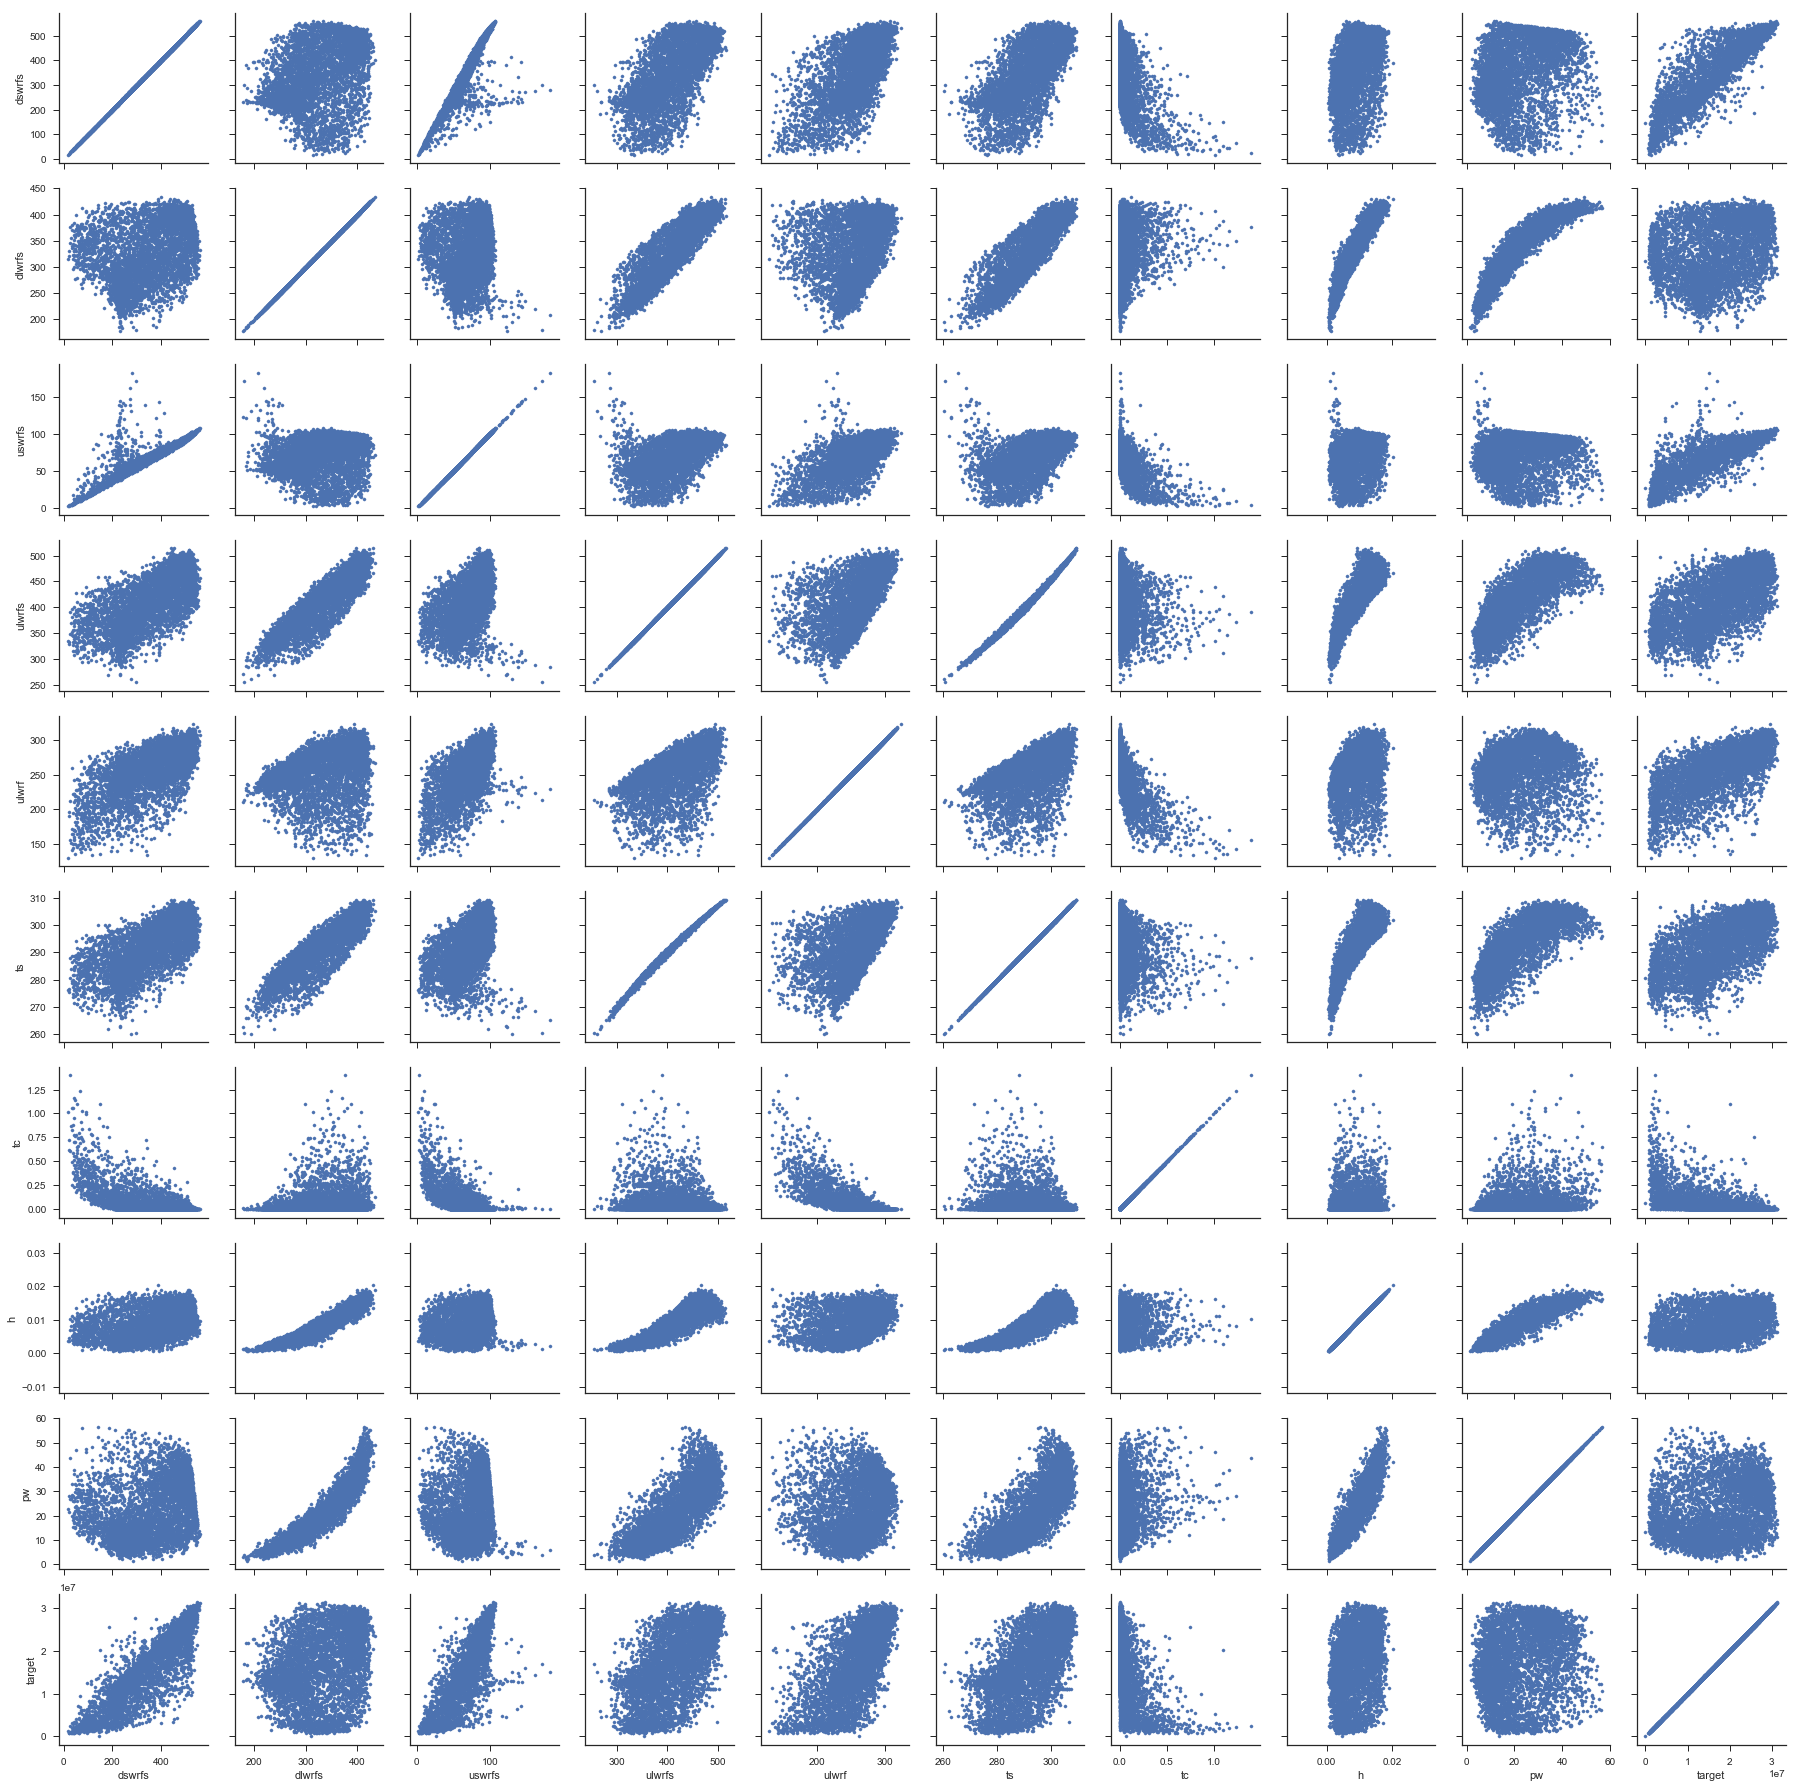

In [149]:
# visualizing correlation among variables
# up, down, net radiative flux, mimimum t, t, maxt, precip, tcc, pressure, are removed 
var_target_m= pd.concat([dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf, ts, tc, h, pw, y], axis=1)
var_target_m.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf', 'ts', 'tc', 'h', 'pw', 'target']

sns.set(style="ticks")
var_target_mg = sns.PairGrid(var_target_m)
var_target_mg.map(plt.scatter, s=10)
plt.savefig('var_target.png')


# 7. Can we reduce the dimension of the dataset? Would it impact the performance?

That would be the next step of the work. We can very well reduce the dimension to train the data, using only the input variables with higher correlation. Then we would use the entire input dataset and compare the performance. If the error is within 10%, we can conclude the reduced input dataset to be the effective one.